In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
import yfinance as yf
import datetime as dt

stock = "AAPL"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 3, 1)

df = yf.download(stock, start, end)


C:\Users\nehab\AppData\Local\Temp\ipykernel_23964\3270396643.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.841048,0.845274,0.764034,0.787983,535796800
2000-01-04,0.770139,0.831186,0.760277,0.813341,512377600
2000-01-05,0.781408,0.830716,0.773895,0.779530,778321600
2000-01-06,0.713787,0.803949,0.713787,0.797375,767972800
2000-01-07,0.747598,0.758869,0.717544,0.725057,460734400


In [4]:
df.shape


(6328, 5)

In [5]:
df.info

<bound method DataFrame.info of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2000-01-03    0.841048    0.845274    0.764034    0.787983  535796800
2000-01-04    0.770139    0.831186    0.760277    0.813341  512377600
2000-01-05    0.781408    0.830716    0.773895    0.779530  778321600
2000-01-06    0.713787    0.803949    0.713787    0.797375  767972800
2000-01-07    0.747598    0.758869    0.717544    0.725057  460734400
...                ...         ...         ...         ...        ...
2025-02-24  246.776398  248.534087  244.099900  244.609226   51326400
2025-02-25  246.716461  249.672591  244.589261  247.675211   48013300
2025-02-26  240.045212  244.659156  238.816827  244.010014   44433600
2025-02-27  236.989227  242.142473  236.749536  239.096465   41153600
2025-02-28  241.523270  241.772942  229.898515  236.639674

In [6]:
df.isnull().sum()


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,6328.000000,6328.000000,6328.000000,6328.000000,6.328000e+03
mean,42.394222,42.811673,41.932031,42.359365,3.838680e+08
std,61.812883,62.397055,61.148045,61.744071,3.834394e+08
min,0.197156,0.198208,0.191145,0.195202,2.323470e+07
25%,2.023173,2.053151,1.992817,2.024525,1.139744e+08
50%,14.031273,14.168773,13.852554,14.036629,2.651446e+08
75%,44.985347,45.319897,44.488501,44.842864,5.157453e+08
max,258.396667,259.474086,257.010028,257.568678,7.421641e+09


In [8]:
df = df.reset_index()


In [9]:
df.columns


MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [10]:

df.to_csv(f"D:\PRJCT\StockPrediction\price\{stock}.csv")
print(f"Saved: {stock}")

Saved: AAPL


In [11]:
data01 = pd.read_csv("D:\PRJCT\StockPrediction\price\AAPL.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,0,2000-01-03,0.8410475850105286,0.8452737254172048,0.7640336296269649,0.787983229909197,535796800
2,1,2000-01-04,0.7701388597488403,0.8311858638470322,0.7602771297069586,0.8133414853684556,512377600
3,2,2000-01-05,0.7814083695411682,0.8307162131584468,0.7738953040304676,0.779530090623911,778321600
4,3,2000-01-06,0.7137866616249084,0.8039493784334993,0.7137866616249084,0.7973754264275039,767972800


In [13]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df = df.drop(['Date'], axis = 1)

C:\Users\nehab\AppData\Local\Temp\ipykernel_23964\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.841048,0.845274,0.764034,0.787983,535796800
1,0.770139,0.831186,0.760277,0.813341,512377600
2,0.781408,0.830716,0.773895,0.779530,778321600
3,0.713787,0.803949,0.713787,0.797375,767972800
4,0.747598,0.758869,0.717544,0.725057,460734400


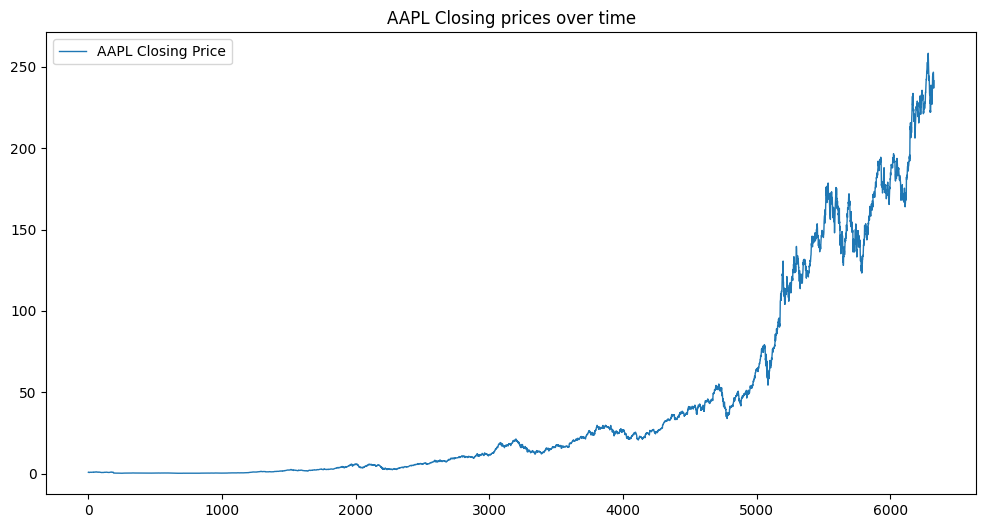

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

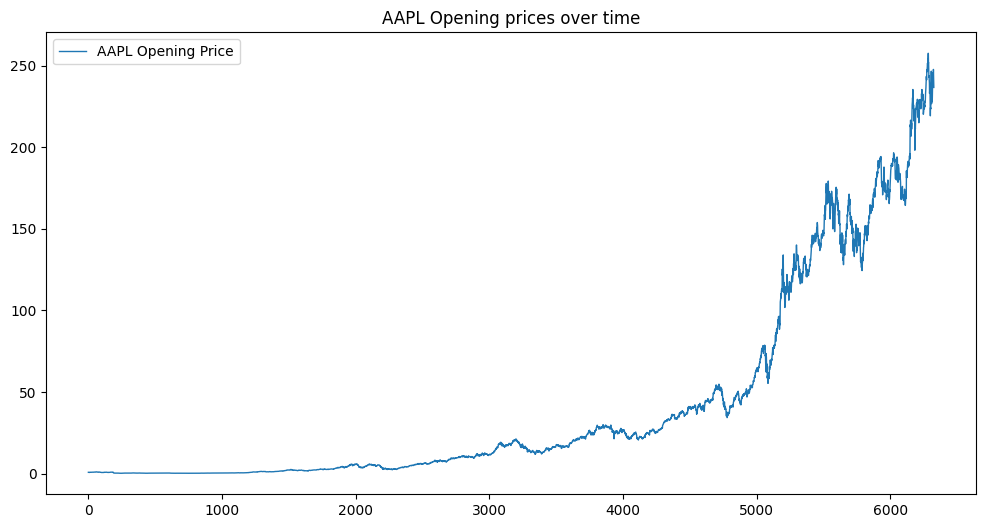

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

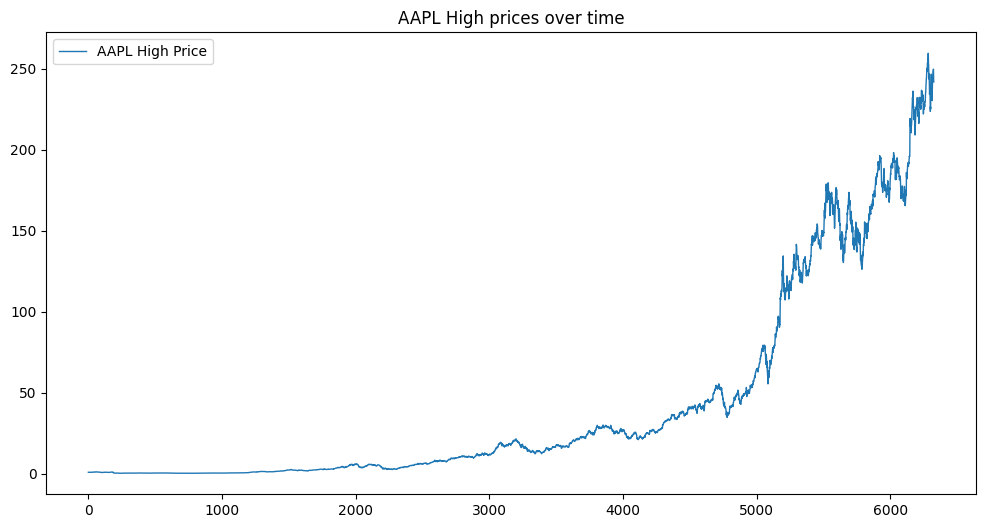

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

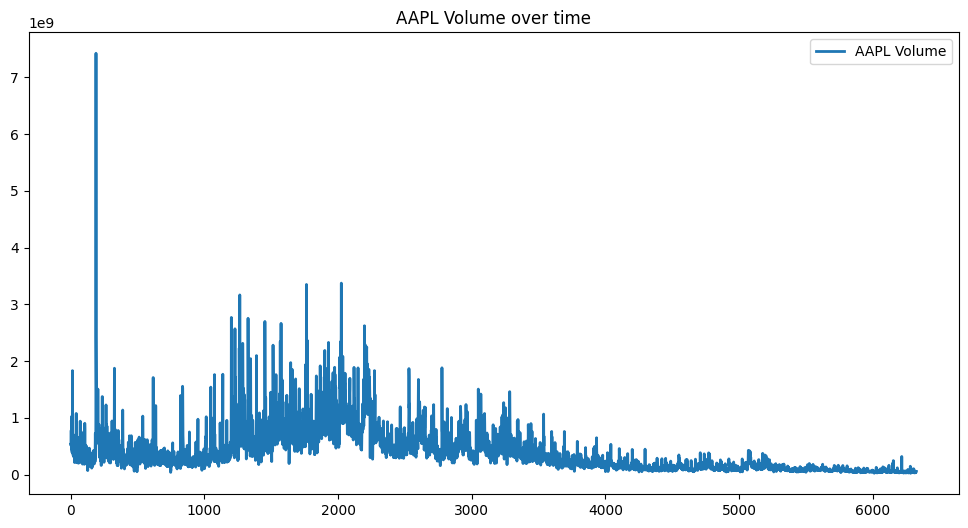

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [21]:
ma100 = df.Close.rolling(100).mean()


In [22]:
ma100


Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6323,235.118735
6324,235.264061
6325,235.410337
6326,235.520373


In [23]:
ma200=df.Close.rolling(200).mean()

In [24]:
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6323,223.948421
6324,224.275478
6325,224.567489
6326,224.835125


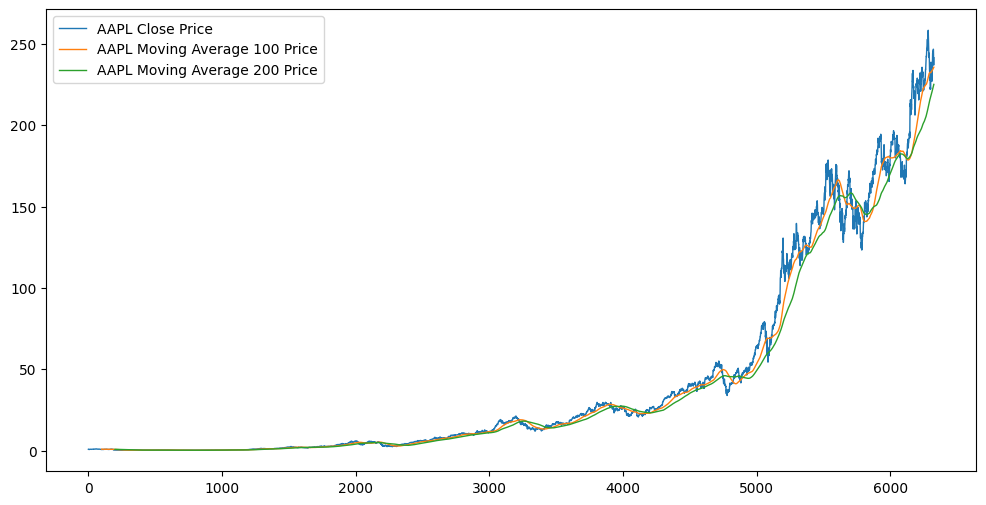

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [26]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

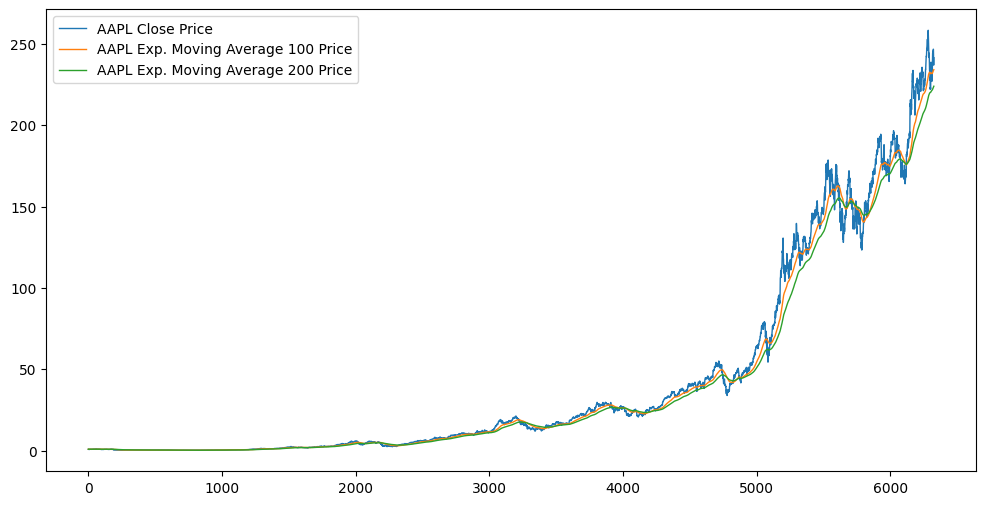

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [28]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
data_training.shape

(4429, 1)

In [29]:
data_testing.shape

(1899, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [31]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01725397],
       [0.01535387],
       [0.01565585],
       ...,
       [0.98595619],
       [0.99388305],
       [1.        ]])

In [32]:
data_training_array.shape[0]

4429

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)
x_train.shape

(4329, 100, 1)

In [34]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [35]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

d:\PRJCT\StockPrediction\p_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 0.0355
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - loss: 0.0042
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - loss: 0.0035
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - loss: 0.0030
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - loss: 0.0032
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0034
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0026
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0026
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - loss: 0.0023
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0024
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0020
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0022
Epoch 13/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 0.0021
Epoch 14/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 0.0022
Epoch 15/50
136

In [38]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [41]:
final_df.head

<bound method NDFrame.head of Ticker        AAPL
0        32.814770
1        32.438976
2        32.805492
3        32.689499
4        32.624557
...            ...
1994    246.776398
1995    246.716461
1996    240.045212
1997    236.989227
1998    241.523270

[1999 rows x 1 columns]>

In [42]:
input_data = scaler.fit_transform(final_df)

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [44]:
x_test.shape

(1899, 100, 1)

In [45]:
y_predicted = model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step


In [46]:
y_predicted.shape

(1899, 1)

In [47]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

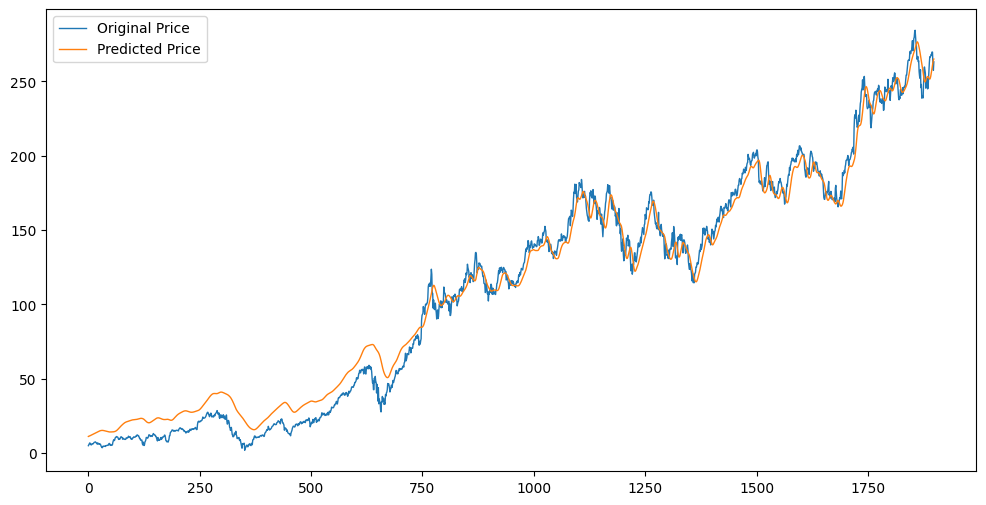

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [51]:
# DO NOT fit again — only transform
input_data = scaler.transform(final_df)

# Extract last 100 days
last_100_days = input_data[-100:]

# Reshape for LSTM
x_next = np.array([last_100_days]).reshape(1, 100, 1)

# Predict
next_day_scaled = model.predict(x_next)
next_day_price = next_day_scaled[0][0] / scaler.scale_[0]  # Use scaler factor

# Get the actual last price (already unscaled)
last_actual_price = data_testing.iloc[-1][0]  # raw 'Close' value from test data

# Direction
if next_day_price > last_actual_price:
    direction = "📈 UP"
elif next_day_price < last_actual_price:
    direction = "📉 DOWN"
else:
    direction = "➡️ NO CHANGE"

# Print
print(f"📈 Predicted Closing Price: ₹{next_day_price:.2f}")
print(f"🔄 Compared to Last Price (₹{last_actual_price:.2f}): {direction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
📈 Predicted Closing Price: ₹210.73
🔄 Compared to Last Price (₹241.52): 📉 DOWN


C:\Users\nehab\AppData\Local\Temp\ipykernel_23964\2103218610.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

